## Covid-19 Regression Model Analysis
#### Comparison of the performance for each of the following Regression models: `Polynomial-2`, `Polynomial-3`, `Polynomial-4`, and `Polynomial-5`


In [18]:
#   Import dependencies
import operator
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures


In [24]:
#   Read the csv file into a pandas DataFrame
df = pd.read_csv('../CSVs/covid_cases.csv', 
                 parse_dates=['date'])
df


,Unnamed: 0,country_id,date,confirmed,deaths,recovered,active,new_cases,new_deaths,new_recovered
0,0,AFG,2020-01-22,0,0,0.0,0.0,0,0,0
1,1,AFG,2020-01-23,0,0,0.0,0.0,0,0,0
2,2,AFG,2020-01-24,0,0,0.0,0.0,0,0,0
3,3,AFG,2020-01-25,0,0,0.0,0.0,0,0,0
4,4,AFG,2020-01-26,0,0,0.0,0.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
142552,142552,ZWE,2022-03-06,239209,5399,0.0,233810.0,190,2,0
142553,142553,ZWE,2022-03-07,239710,5399,0.0,234311.0,501,0,0
142554,142554,ZWE,2022-03-08,240343,5400,0.0,234943.0,633,1,0
142555,142555,ZWE,2022-03-09,240343,5400,0.0,234943.0,0,0,0


In [25]:
#   Get the info for the df
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142557 entries, 0 to 142556
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Unnamed: 0     142557 non-null  int64         
 1   country_id     142557 non-null  object        
 2   date           142557 non-null  datetime64[ns]
 3   confirmed      142557 non-null  int64         
 4   deaths         142557 non-null  int64         
 5   recovered      142557 non-null  float64       
 6   active         142557 non-null  float64       
 7   new_cases      142557 non-null  int64         
 8   new_deaths     142557 non-null  int64         
 9   new_recovered  142557 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(6), object(1)
memory usage: 10.9+ MB


In [26]:
#df.drop('new_cases', 'new_deaths', 'new_recovered', inplace=True)
#df
df.drop('new_cases', axis=1, inplace=True)
df.drop('new_deaths', axis=1, inplace=True)
df.drop('new_recovered', axis=1, inplace=True)
df


,Unnamed: 0,country_id,date,confirmed,deaths,recovered,active
0,0,AFG,2020-01-22,0,0,0.0,0.0
1,1,AFG,2020-01-23,0,0,0.0,0.0
2,2,AFG,2020-01-24,0,0,0.0,0.0
3,3,AFG,2020-01-25,0,0,0.0,0.0
4,4,AFG,2020-01-26,0,0,0.0,0.0
...,...,...,...,...,...,...,...
142552,142552,ZWE,2022-03-06,239209,5399,0.0,233810.0
142553,142553,ZWE,2022-03-07,239710,5399,0.0,234311.0
142554,142554,ZWE,2022-03-08,240343,5400,0.0,234943.0
142555,142555,ZWE,2022-03-09,240343,5400,0.0,234943.0


In [27]:
# Use Pandas get_dummies to convert categorical data
df = pd.get_dummies(df)
df


,Unnamed: 0,date,confirmed,deaths,recovered,active,country_id_AFG,country_id_AGO,country_id_ALB,country_id_AND,...,country_id_UZB,country_id_VCT,country_id_VEN,country_id_VNM,country_id_VUT,country_id_WSM,country_id_YEM,country_id_ZAF,country_id_ZMB,country_id_ZWE
0,0,2020-01-22,0,0,0.0,0.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,2020-01-23,0,0,0.0,0.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,2020-01-24,0,0,0.0,0.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,2020-01-25,0,0,0.0,0.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,2020-01-26,0,0,0.0,0.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142552,142552,2022-03-06,239209,5399,0.0,233810.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
142553,142553,2022-03-07,239710,5399,0.0,234311.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
142554,142554,2022-03-08,240343,5400,0.0,234943.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
142555,142555,2022-03-09,240343,5400,0.0,234943.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [28]:
#   Use 'resample' to convert daily data to monthly data
df_mthly = df.set_index('date').resample('M')["confirmed", "deaths", "recovered", "active"].mean()
df_mthly


,confirmed,deaths,recovered,active
date,,,,
2020-01-31,2.102131e+01,0.485792,0.471585,2.006393e+01
2020-02-29,3.107946e+02,8.814585,68.478048,2.335020e+02
2020-03-31,1.555081e+03,70.267936,456.410189,1.028403e+03
2020-04-30,1.151036e+04,804.109654,2862.488342,7.843762e+03
2020-05-31,2.548386e+04,1761.588577,9261.222281,1.446105e+04
2020-06-30,4.481877e+04,2544.576321,21235.772678,2.103842e+04
2020-07-31,7.590138e+04,3401.639521,42102.394853,3.039735e+04
2020-08-31,1.181844e+05,4417.543804,73831.566191,3.993525e+04
2020-09-30,1.626642e+05,5377.180510,109818.552095,4.746843e+04


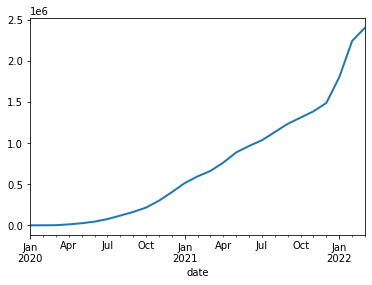

In [29]:
chart = df_mthly['confirmed'].plot(linewidth=2)


In [32]:
#   Check if "date" exists
x = df.get("date")
print(x)


0        2020-01-22
1        2020-01-23
2        2020-01-24
3        2020-01-25
4        2020-01-26
            ...    
142552   2022-03-06
142553   2022-03-07
142554   2022-03-08
142555   2022-03-09
142556   2022-03-10
Name: date, Length: 142557, dtype: datetime64[ns]


In [ ]:
# Assign X (date) and y (target)
X = df_mthly['date']
y = df_mthly['confirmed'].values.reshape(-1, 1)
print(X.shape, y.shape)


Mustang


In [ ]:

#np.random.seed(0)
#x = 2 - 3 * np.random.normal(0, 1, 20)
#y = x - 2 * (x ** 2) + 0.5 * (x ** 3) + np.random.normal(-3, 3, 20)

# transforming the data to include another axis
#x = x[:, np.newaxis]
#y = y[:, np.newaxis]

polynomial_features= PolynomialFeatures(degree=5)
x_poly = polynomial_features.fit_transform(x)

model = LinearRegression()
model.fit(x_poly, y)
y_poly_pred = model.predict(x_poly)

rmse = np.sqrt(mean_squared_error(y,y_poly_pred))
r2 = r2_score(y,y_poly_pred)
print(rmse)
print(r2)

plt.scatter(x, y, s=10)
# sort the values of x before line plot
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x,y_poly_pred), key=sort_axis)
x, y_poly_pred = zip(*sorted_zip)
plt.plot(x, y_poly_pred, color='m')
plt.show()

